In [1]:
"""!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost"""
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 55.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 61.0 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=e4e1d8e0b261f7e50ddcf8dc42c21cafcc04619255238e70ba2fecb991fa4962
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=eb0a840dd6f49f81a1c17619d639ae689e5ef511478821d268e5cac4d44ba98c
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a72463

In [2]:
import pandas as pd #To read our datasets
import numpy as np  #Performing operations on arrays
from fancyimpute import KNN  #Imputing null values
import seaborn as sns  #visualization library for high end images
import matplotlib.pyplot as plt  #Visualization library
from sklearn.model_selection import train_test_split, GridSearchCV  #Functions that help us during modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder  #Functions that help you prepare data for inferential analysis
from sklearn.linear_model import LogisticRegressionCV  #Linear model that handles classification problems
from sklearn.tree import DecisionTreeClassifier  #Tree model 
from sklearn.ensemble import RandomForestClassifier #Boosting model made up of many decision trees
from sklearn.neural_network import MLPClassifier #Neural Network from sklearn
from sklearn.metrics import classification_report, confusion_matrix # Metrics to evaluate the performance of our model
import xgboost #Boosting model 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv(r"/kaggle/input/spaceship-titanic/train.csv") #Train data for building our model
test_df = pd.read_csv(r"/kaggle/input/spaceship-titanic/test.csv") #Test data for inferencing 

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train_df.isna().any() #Checking for null values

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [6]:
train_df.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [9]:
train_df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [10]:
train_df['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [11]:
train_df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [12]:
train_df['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [13]:
for col in train_df.columns:
    null_count = train_df[col].isnull().sum()
    if null_count > 0:
        print(f"{col} has {null_count} null values")

HomePlanet has 201 null values
CryoSleep has 217 null values
Cabin has 199 null values
Destination has 182 null values
Age has 179 null values
VIP has 203 null values
RoomService has 181 null values
FoodCourt has 183 null values
ShoppingMall has 208 null values
Spa has 183 null values
VRDeck has 188 null values
Name has 200 null values


In [14]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [15]:
# Separate categorical and numerical columns
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Impute numerical columns
imputer = KNN(k=5)
X_imputed = imputer.fit_transform(train_df[num_cols])
train_df[num_cols] = X_imputed

# Impute categorical columns
for col in cat_cols:
    train_df[col] = train_df[col].fillna("Unknown")

Imputing row 1/8693 with 0 missing, elapsed time: 10.182
Imputing row 101/8693 with 0 missing, elapsed time: 10.184
Imputing row 201/8693 with 0 missing, elapsed time: 10.185
Imputing row 301/8693 with 0 missing, elapsed time: 10.186
Imputing row 401/8693 with 1 missing, elapsed time: 10.187
Imputing row 501/8693 with 0 missing, elapsed time: 10.188
Imputing row 601/8693 with 0 missing, elapsed time: 10.189
Imputing row 701/8693 with 0 missing, elapsed time: 10.190
Imputing row 801/8693 with 0 missing, elapsed time: 10.191
Imputing row 901/8693 with 0 missing, elapsed time: 10.192
Imputing row 1001/8693 with 1 missing, elapsed time: 10.193
Imputing row 1101/8693 with 0 missing, elapsed time: 10.194
Imputing row 1201/8693 with 0 missing, elapsed time: 10.195
Imputing row 1301/8693 with 0 missing, elapsed time: 10.196
Imputing row 1401/8693 with 1 missing, elapsed time: 10.197
Imputing row 1501/8693 with 0 missing, elapsed time: 10.198
Imputing row 1601/8693 with 0 missing, elapsed time:

In [16]:
# Separate categorical and numerical columns
cat_cols_t = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
num_cols_t = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Impute numerical columns
imputert = KNN(k=5)
Xt_imputed = imputert.fit_transform(test_df[num_cols_t])
test_df[num_cols_t] = Xt_imputed

# Impute categorical columns
for col in cat_cols_t:
    test_df[col] = test_df[col].fillna("Unknown")

Imputing row 1/4277 with 0 missing, elapsed time: 2.407
Imputing row 101/4277 with 0 missing, elapsed time: 2.408
Imputing row 201/4277 with 0 missing, elapsed time: 2.409
Imputing row 301/4277 with 0 missing, elapsed time: 2.410
Imputing row 401/4277 with 0 missing, elapsed time: 2.411
Imputing row 501/4277 with 1 missing, elapsed time: 2.411
Imputing row 601/4277 with 0 missing, elapsed time: 2.412
Imputing row 701/4277 with 0 missing, elapsed time: 2.413
Imputing row 801/4277 with 0 missing, elapsed time: 2.414
Imputing row 901/4277 with 0 missing, elapsed time: 2.415
Imputing row 1001/4277 with 0 missing, elapsed time: 2.415
Imputing row 1101/4277 with 0 missing, elapsed time: 2.416
Imputing row 1201/4277 with 0 missing, elapsed time: 2.417
Imputing row 1301/4277 with 1 missing, elapsed time: 2.418
Imputing row 1401/4277 with 0 missing, elapsed time: 2.418
Imputing row 1501/4277 with 0 missing, elapsed time: 2.419
Imputing row 1601/4277 with 0 missing, elapsed time: 2.420
Imputing 

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [18]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.848957,224.210830,452.552939,172.055679,307.511171,301.929334
std,14.380309,662.700504,1599.179391,598.460245,1125.887989,1135.320253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.186080,79.000000,29.000000,61.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_28/2814404982.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_28/2814404982.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykern

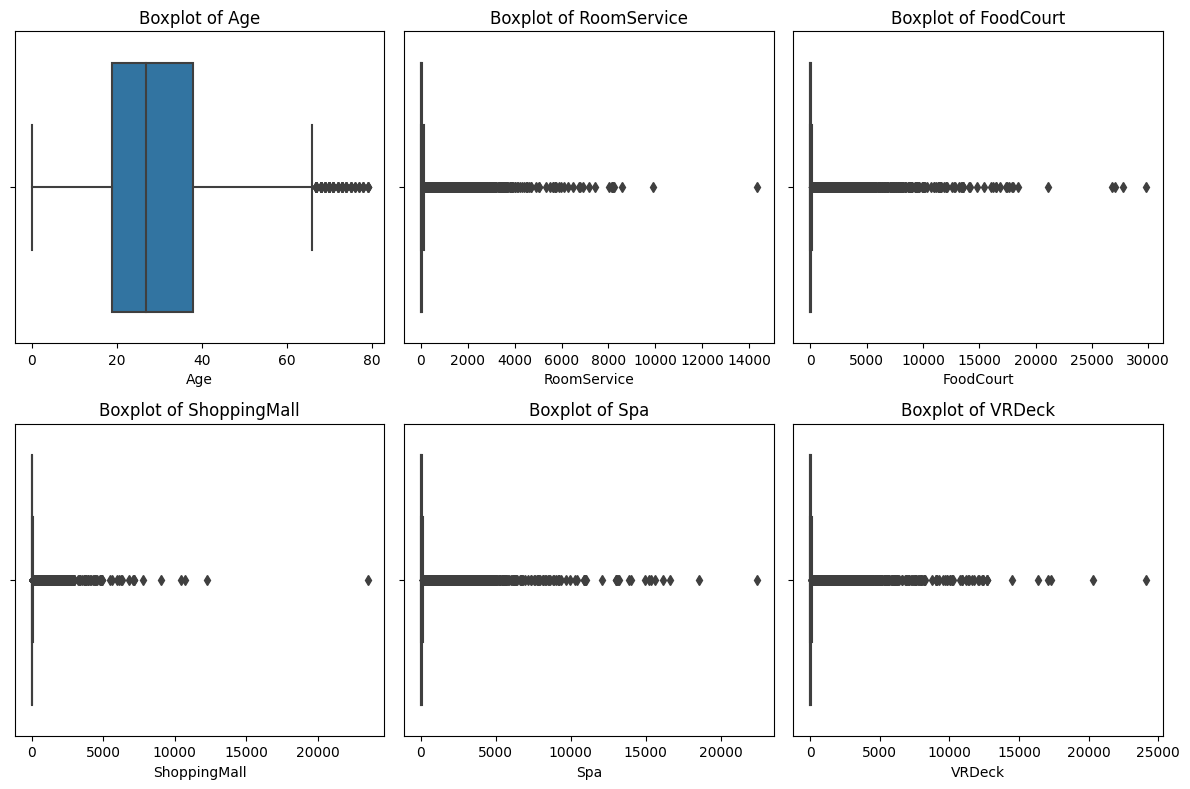

In [19]:
# Create subplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.boxplot(x=train_df[col], orient='vertical')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [20]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [21]:
id_column = train_df['PassengerId']
Name = train_df['Name']

train_df = train_df.drop(['PassengerId','Name'], axis = 1)

In [22]:
id_column_t = test_df['PassengerId']
Name_t = test_df['Name']

test_df = test_df.drop(['PassengerId','Name'], axis = 1)

In [23]:
def categorize_cabin(Cabin):
    if Cabin.endswith('P'):
        return 'Port'
    elif Cabin.endswith('S'):
        return 'Starboard'
    else:
        return 'Unknown'

# Apply the categorize_cabin function to the 'Cabin' column and create a new 'Category' column
train_df['Cabin_Category'] = train_df['Cabin'].apply(categorize_cabin)

train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Category
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Port
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Starboard
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Starboard
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Starboard
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Starboard


In [24]:
# Apply the categorize_cabin function to the 'Cabin' column and create a new 'Category' column
test_df['Cabin_Category'] = test_df['Cabin'].apply(categorize_cabin)

In [25]:
train_df = train_df.drop('Cabin', axis =1)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Port
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Starboard
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Starboard
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Starboard
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Starboard


In [26]:
test_df = test_df.drop('Cabin', axis =1)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Category
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Starboard
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Starboard
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Starboard
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Starboard
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Starboard


In [27]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: count, dtype: int64

In [28]:
train_df = pd.get_dummies(train_df)

In [29]:
test_df = pd.get_dummies(test_df)

In [30]:
train_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_False,VIP_True,VIP_Unknown,Cabin_Category_Port,Cabin_Category_Starboard,Cabin_Category_Unknown
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,True,False,False,False,True,False


In [31]:
label_encoder = LabelEncoder()

# Loop through the columns of the DataFrame
for column in train_df.columns:
    # Check if the column has object dtype and less than or equal to two unique values
    if len(train_df[column].unique()) <= 2:
        print(f"Column '{column}' has <= 2 unique values and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        train_df[column] = label_encoder.fit_transform(train_df[column])
    else:
        print(f"Column '{column}' is not eligible for transformation.")

# Display the modified DataFrame
print(train_df)

Column 'Age' is not eligible for transformation.
Column 'RoomService' is not eligible for transformation.
Column 'FoodCourt' is not eligible for transformation.
Column 'ShoppingMall' is not eligible for transformation.
Column 'Spa' is not eligible for transformation.
Column 'VRDeck' is not eligible for transformation.
Column 'Transported' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Earth' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Europa' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Mars' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Unknown' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'CryoSleep_False' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'CryoSleep_True' has <= 2 unique values and will be converted to binary

In [32]:
# Loop through the columns of the DataFrame
for column in test_df.columns:
    # Check if the column has object dtype and less than or equal to two unique values
    if len(test_df[column].unique()) <= 2:
        print(f"Column '{column}' has <= 2 unique values and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        test_df[column] = label_encoder.fit_transform(test_df[column])
    else:
        print(f"Column '{column}' is not eligible for transformation.")

# Display the modified DataFrame
print(test_df)

Column 'Age' is not eligible for transformation.
Column 'RoomService' is not eligible for transformation.
Column 'FoodCourt' is not eligible for transformation.
Column 'ShoppingMall' is not eligible for transformation.
Column 'Spa' is not eligible for transformation.
Column 'VRDeck' is not eligible for transformation.
Column 'HomePlanet_Earth' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Europa' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Mars' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'HomePlanet_Unknown' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'CryoSleep_False' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'CryoSleep_True' has <= 2 unique values and will be converted to binary using LabelEncoder.
Column 'CryoSleep_Unknown' has <= 2 unique values and will be converted to 

In [33]:
#Splitting target from ds
y = train_df['Transported']

X = train_df.drop('Transported', axis=1)

In [34]:
#Correlation test
corr = X.corrwith(y)
print(corr)

Age                         -0.071698
RoomService                 -0.243523
FoodCourt                    0.044191
ShoppingMall                 0.007453
Spa                         -0.219670
VRDeck                      -0.205779
HomePlanet_Earth            -0.169019
HomePlanet_Europa            0.176916
HomePlanet_Mars              0.019544
HomePlanet_Unknown           0.002712
CryoSleep_False             -0.451744
CryoSleep_True               0.460132
CryoSleep_Unknown           -0.004846
Destination_55 Cancri e      0.108722
Destination_PSO J318.5-22    0.000092
Destination_TRAPPIST-1e     -0.094700
Destination_Unknown          0.000547
VIP_False                    0.024602
VIP_True                    -0.037261
VIP_Unknown                  0.002688
Cabin_Category_Port         -0.101397
Cabin_Category_Starboard     0.101455
Cabin_Category_Unknown      -0.000340
dtype: float64


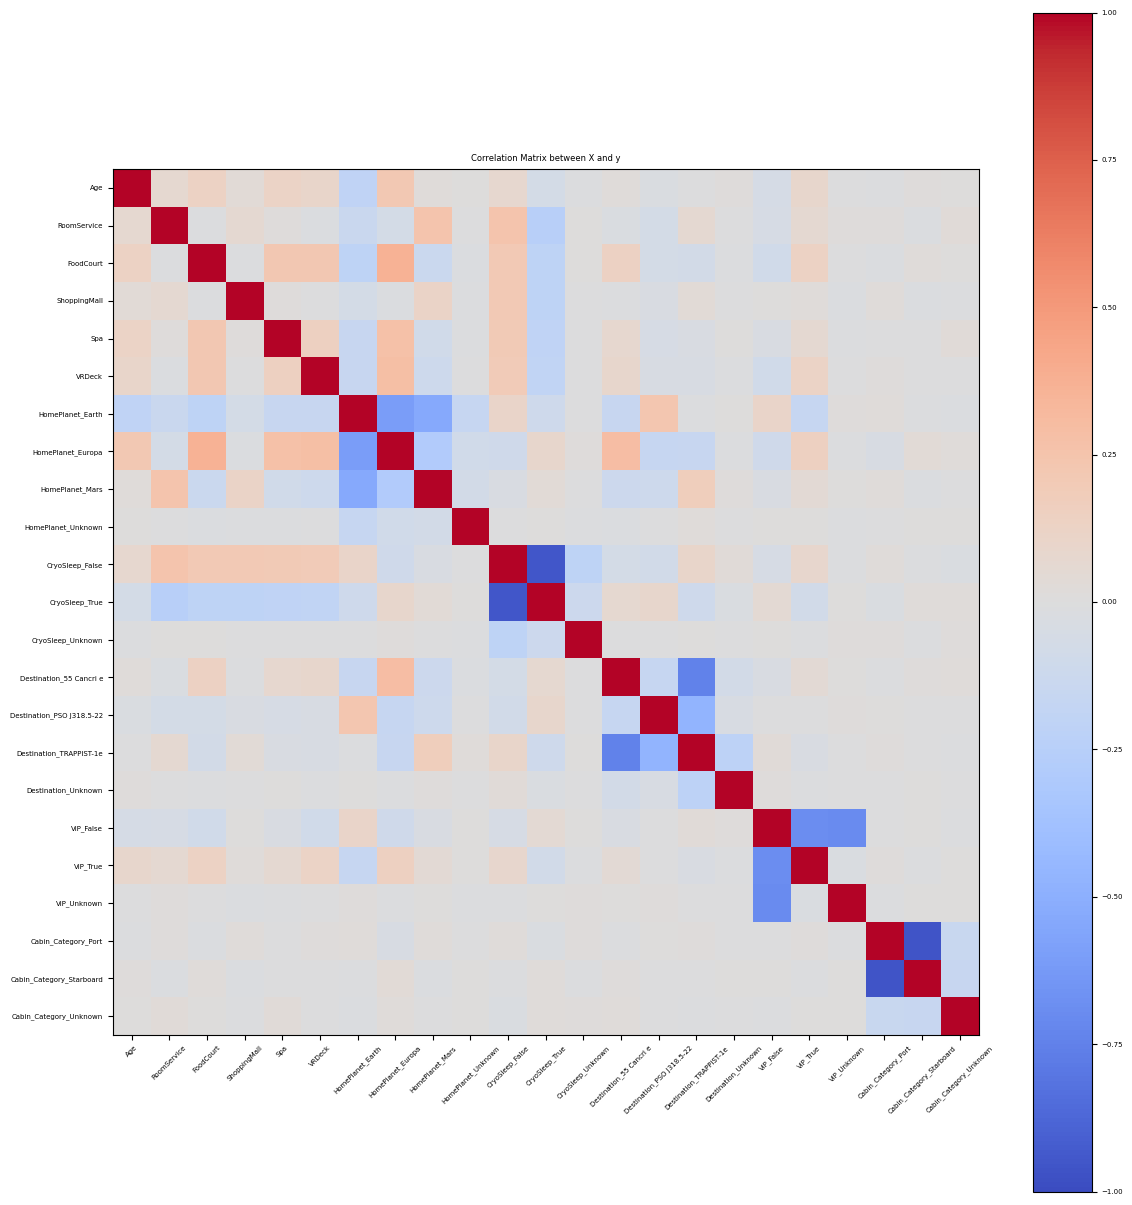

In [35]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Set the font size for labels
plt.rc('font', size=5)

# Create a heatmap plot of the correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix between X and y')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

In [36]:
X = X.drop(['ShoppingMall','HomePlanet_Unknown','CryoSleep_Unknown','Destination_PSO J318.5-22','Destination_Unknown','VIP_Unknown','Cabin_Category_Unknown'], axis=1)

In [37]:
X.head()

,Age,RoomService,FoodCourt,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_Category_Port,Cabin_Category_Starboard
0,39.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,1,0,1,0
1,24.0,109.0,9.0,549.0,44.0,1,0,0,1,0,0,1,1,0,0,1
2,58.0,43.0,3576.0,6715.0,49.0,0,1,0,1,0,0,1,0,1,0,1
3,33.0,0.0,1283.0,3329.0,193.0,0,1,0,1,0,0,1,1,0,0,1
4,16.0,303.0,70.0,565.0,2.0,1,0,0,1,0,0,1,1,0,0,1


## **Modelling**

In [38]:
#Splitting data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [39]:
#Logistic Regression 

lr = LogisticRegressionCV()

#Train
lr.fit(X_train,y_train)

#Make the predicition on test data
y_pred= lr.predict(X_test)

#Evaluate the model
lr_confusion = confusion_matrix(y_test,y_pred)
lr_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", lr_confusion)
print("\nClassification Report:\n", lr_report)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Confusion Matrix:
 [[612 249]
 [146 732]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       861
           1       0.75      0.83      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Decision tree

dt = DecisionTreeClassifier()

#Train
dt.fit(X_train,y_train)

#Make the predicition on test data
y_pred= dt.predict(X_test)

#Evaluate the model
dt_confusion = confusion_matrix(y_test,y_pred)
dt_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", dt_confusion)
print("\nClassification Report:\n", dt_report)


Confusion Matrix:
 [[609 252]
 [217 661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       861
           1       0.72      0.75      0.74       878

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739



In [41]:
#Random Forest

rf = RandomForestClassifier()

#Train
rf.fit(X_train,y_train)

#Make the predicition on test data
y_pred= rf.predict(X_test)

#Evaluate the model
rf_confusion = confusion_matrix(y_test,y_pred)
rf_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", rf_confusion)
print("\nClassification Report:\n", rf_report)


Confusion Matrix:
 [[675 186]
 [218 660]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       861
           1       0.78      0.75      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [42]:
#MLP

mlp = MLPClassifier()

#Train
mlp.fit(X_train,y_train)

#Make the predicition on test data
y_pred= mlp.predict(X_test)

#Evaluate the model
mlp_confusion = confusion_matrix(y_test,y_pred)
mlp_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", mlp_confusion)
print("\nClassification Report:\n", mlp_report)


Confusion Matrix:
 [[549 312]
 [139 739]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       861
           1       0.70      0.84      0.77       878

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



## Fine-Tuning

In [43]:
#Logistic Regression 
# Set other hyperparameters as needed
model = LogisticRegressionCV(
    Cs=[1, 10, 100],           # Candidate values for the inverse of regularization strength (C)
    cv=5,                      # Number of cross-validation folds
    max_iter=1000,             # Maximum number of iterations
    random_state=42,           # Random seed for reproducibility
    solver='lbfgs'             # Optimization solver
)
#Train
model.fit(X_train,y_train)

#Make the predicition on test data
y_pred= model.predict(X_test)

#Evaluate the model
model_confusion = confusion_matrix(y_test,y_pred)
model_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", model_confusion)
print("\nClassification Report:\n", model_report)


Confusion Matrix:
 [[635 226]
 [172 706]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       861
           1       0.76      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [45]:
import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')
 
# Create a logistic regression model
lr = LogisticRegressionCV()

# Define hyperparameters and their candidate values for grid search
param_grid = {
    'Cs': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg'],  # Optimization solver
    'max_iter': [100, 500, 1000,2000]  # Maximum number of iterations
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Best Hyperparameters: {'Cs': 10, 'max_iter': 100, 'solver': 'newton-cg'}

Confusion Matrix:
 [[611 250]
 [145 733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       861
           1       0.75      0.83      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [53]:
#SVC 
from sklearn.svm import SVC
svc = SVC()

#Train
svc.fit(X_train,y_train)

#Make the predicition on test data
y_pred= svc.predict(X_test)

#Evaluate the model
svc_confusion = confusion_matrix(y_test,y_pred)
svc_report = classification_report(y_test,y_pred)

#Output
print("\nConfusion Matrix:\n", svc_confusion)
print("\nClassification Report:\n", svc_report)


Confusion Matrix:
 [[579 282]
 [111 767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75       861
           1       0.73      0.87      0.80       878

    accuracy                           0.77      1739
   macro avg       0.79      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8693 non-null   float64
 1   RoomService               8693 non-null   float64
 2   FoodCourt                 8693 non-null   float64
 3   Spa                       8693 non-null   float64
 4   VRDeck                    8693 non-null   float64
 5   HomePlanet_Earth          8693 non-null   int64  
 6   HomePlanet_Europa         8693 non-null   int64  
 7   HomePlanet_Mars           8693 non-null   int64  
 8   CryoSleep_False           8693 non-null   int64  
 9   CryoSleep_True            8693 non-null   int64  
 10  Destination_55 Cancri e   8693 non-null   int64  
 11  Destination_TRAPPIST-1e   8693 non-null   int64  
 12  VIP_False                 8693 non-null   int64  
 13  VIP_True                  8693 non-null   int64  
 14  Cabin_Ca

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

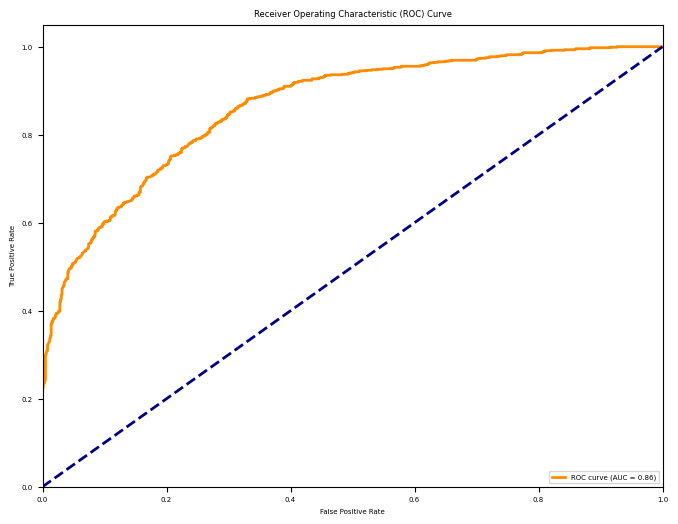

In [56]:
# Get predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Balancing using SMOTE! #KATRULES!

In [54]:
y_test.value_counts()

Transported
1    878
0    861
Name: count, dtype: int64

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE